<a href="https://colab.research.google.com/github/AmiraAlaa3/Predict-Number-of-Rented-Bikes-Competition/blob/main/Predict_Number_of_Rented_Bikes_each_hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("/content/train.csv", encoding= 'unicode_escape')

In [ ]:
test = pd.read_csv("/content/test.csv", encoding= 'unicode_escape')

In [ ]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        6000 non-null   object 
 1   Rented Bike Count           6000 non-null   int64  
 2   Hour                        6000 non-null   int64  
 3   Temperature(Â°C)            6000 non-null   float64
 4   Humidity(%)                 6000 non-null   int64  
 5   Wind speed (m/s)            6000 non-null   float64
 6   Visibility (10m)            6000 non-null   int64  
 7   Dew point temperature(Â°C)  6000 non-null   float64
 8   Solar Radiation (MJ/m2)     6000 non-null   float64
 9   Rainfall(mm)                6000 non-null   float64
 10  Snowfall (cm)               6000 non-null   float64
 11  Seasons                     6000 non-null   object 
 12  Holiday                     6000 non-null   object 
 13  Functioning Day             6000 

In [ ]:
test=test.set_index("ID")

In [ ]:
index=test.index

In [ ]:
test.head(5)

,Date,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
ID,,,,,,,,,,,,,
0,8/8/2018,0,29.1,77,2.1,1465,24.6,0.0,0.0,0.0,Summer,No Holiday,Yes
1,8/8/2018,1,28.5,80,1.5,1306,24.7,0.0,0.0,0.0,Summer,No Holiday,Yes
2,8/8/2018,2,28.3,84,2.1,1099,25.3,0.0,0.0,0.0,Summer,No Holiday,Yes
3,8/8/2018,3,28.3,84,0.5,1006,25.3,0.0,0.0,0.0,Summer,No Holiday,Yes
4,8/8/2018,4,28.0,85,1.0,1079,25.2,0.0,0.0,0.0,Summer,No Holiday,Yes


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2760 entries, 0 to 2759
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2760 non-null   object 
 1   Hour                        2760 non-null   int64  
 2   Temperature(Â°C)            2760 non-null   float64
 3   Humidity(%)                 2760 non-null   int64  
 4   Wind speed (m/s)            2760 non-null   float64
 5   Visibility (10m)            2760 non-null   int64  
 6   Dew point temperature(Â°C)  2760 non-null   float64
 7   Solar Radiation (MJ/m2)     2760 non-null   float64
 8   Rainfall(mm)                2760 non-null   float64
 9   Snowfall (cm)               2760 non-null   float64
 10  Seasons                     2760 non-null   object 
 11  Holiday                     2760 non-null   object 
 12  Functioning Day             2760 non-null   object 
dtypes: float64(6), int64(3), object(4

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
df = pd.DataFrame(data)
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year
df['Day Name'] = (pd.DatetimeIndex(df['Date']).day_name())

In [ ]:
test['Date']=pd.to_datetime(test['Date'])
df2 = pd.DataFrame(test)
df2['Day'] = pd.DatetimeIndex(df2['Date']).day
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['year'] = pd.DatetimeIndex(df2['Date']).year
df2['Day Name'] = (pd.DatetimeIndex(df2['Date']).day_name())

In [ ]:
print(data['Day'].unique())
print(test['Day'].unique())

print(data['Month'].unique())
print(test['Month'].unique())

print(data['year'].unique())
print(test['year'].unique())

[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  1  2  3  4
  5  6  7  8]
[ 8 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 8  9 10 11 12  1  2  3  4  5  6  7]
[2017 2018]
[2018]


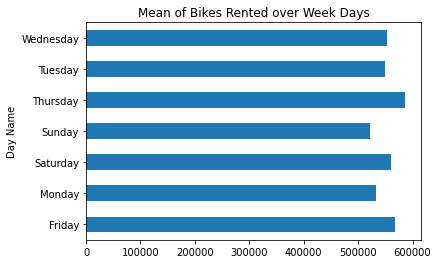

In [ ]:
data.groupby('Day Name')['Rented Bike Count'].sum().plot(kind='barh');
plt.title('Mean of Bikes Rented over Week Days');

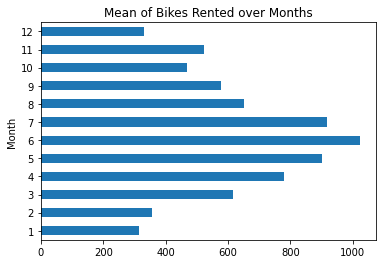

In [ ]:
# Check mean of bike rented per months
data.groupby('Month')['Rented Bike Count'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Months');

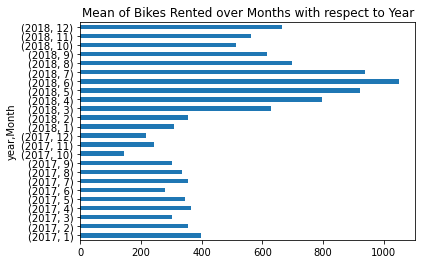

In [ ]:
data.groupby(['year', 'Month'])['Rented Bike Count'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Months with respect to Year');

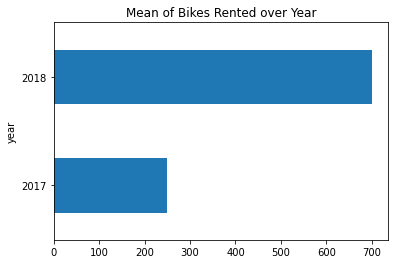

In [ ]:
# Check mean of bike rented per year
data.groupby('year')['Rented Bike Count'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Year');

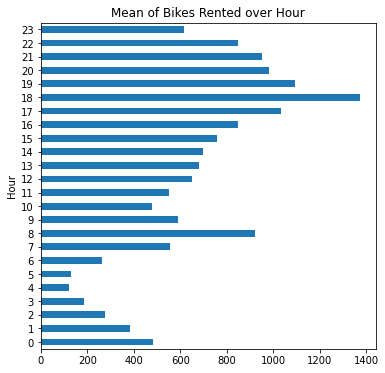

In [ ]:
# Check mean of bike rented per hour
plt.figure(figsize=(6, 6))
data.groupby('Hour')['Rented Bike Count'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Hour');

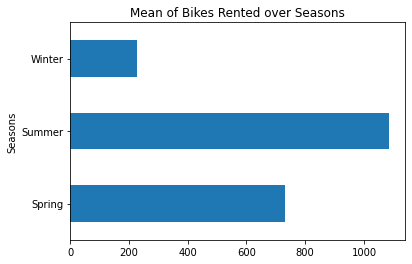

In [ ]:
data.groupby('Seasons')['Rented Bike Count'].mean().plot(kind='barh');
plt.title('Mean of Bikes Rented over Seasons');

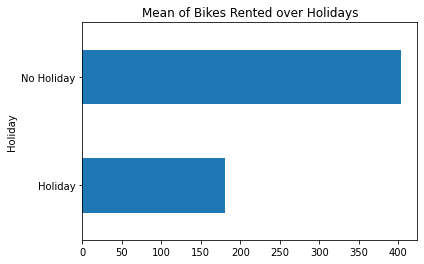

In [ ]:
data.groupby('Holiday')['Rented Bike Count'].median().plot(kind='barh');
plt.title('Mean of Bikes Rented over Holidays');

In [ ]:
sns.displot(data['Rented Bike Count']);

In [ ]:
#skewness
print("Skewness: ",data['Rented Bike Count'].skew())

Skewness:  1.4035286899891888


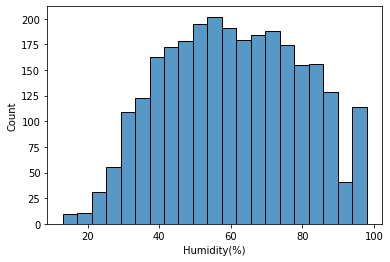

In [ ]:
sns.histplot(test['Humidity(%)']);

In [ ]:
# Converting windspeed to kmh
data['Windkmh']=data['Wind speed (m/s)']*(3.6)
test['Windkmh']=test['Wind speed (m/s)']*(3.6)

In [ ]:
# Temperature-Humidity Index
data['THI'] = 0.8 * data['Temperature(Â°C)'] + data['Humidity(%)']/100 * (data['Temperature(Â°C)'] - 14.4) + 46.4
test['THI'] = 0.8 * test['Temperature(Â°C)'] + test['Humidity(%)']/100 * (test['Temperature(Â°C)'] - 14.4) + 46.4


In [ ]:
data

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,year,Day Name,Windkmh,THI
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,7.92,34.988
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,2.88,34.438
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,3.60,33.644
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,3.24,33.200
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday,8.28,34.256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2018-07-08,1898,19,32.9,56,2.6,1944,22.9,0.40,0.0,0.0,Summer,No Holiday,Yes,8,7,2018,Sunday,9.36,83.080
5996,2018-07-08,1836,20,31.1,64,2.7,1770,23.4,0.02,0.0,0.0,Summer,No Holiday,Yes,8,7,2018,Sunday,9.72,81.968
5997,2018-07-08,1826,21,30.3,69,2.2,1834,23.9,0.00,0.0,0.0,Summer,No Holiday,Yes,8,7,2018,Sunday,7.92,81.611
5998,2018-07-08,1664,22,29.8,75,1.4,1609,24.8,0.00,0.0,0.0,Summer,No Holiday,Yes,8,7,2018,Sunday,5.04,81.790


In [ ]:
#https://link.springer.com/referenceworkentry/10.1007/0-387-30749-4_176

data['THI_comfort'] = np.where(data['THI'] <= 70,1, 0)
data['THI_half_discomfort'] = np.where((data['THI'] > 70) & (data['THI'] <=75),1, 0)
data['THI_sweating'] = np.where((data['THI'] > 75) & (data['THI'] <=80),1, 0)
data['THI_discomfort'] = np.where(data['THI'] > 80 , 1,  0)

test['THI_comfort'] =  np.where(test['THI']<= 70 , 1, 0)
test['THI_half_discomfort'] =  np.where((test['THI'] > 70) & (test['THI'] <=75) ,1, 0)
test['THI_sweating'] =  np.where((test['THI']> 75) & (test['THI'] <=80),1,  0)
test['THI_discomfort'] =  np.where(test['THI'] > 80 , 1,  0)

In [ ]:
#Find the difference between the surface temperature and the dew point. This value is known as the "spread". Divide the spread by 4.4 (if temperatures are in °F) or 2.5 (if temperatures are in °C), then multiply by 1000.
# Cloud-Base Altitude
data['CBI'] = (data['Temperature(Â°C)'] - data['Dew point temperature(Â°C)']) * 400
test['CBI'] = (test['Temperature(Â°C)'] - test['Dew point temperature(Â°C)']) * 400

# OneHot Encoding CBI

data['CBI_low_clouds'] =  np.where(data['CBI'] <= 6500 , 1 , 0)
data['CBI_mid_clouds'] =  np.where((data['CBI']> 6500) & (data['CBI'] <= 25000) ,1, 0)
data['CBI_high_clouds'] =  np.where(data['CBI'] > 25000 ,1, 0)

test['CBI_low_clouds'] =  np.where(test['CBI']<= 6500,1, 0)
test['CBI_mid_clouds'] =  np.where((test['CBI'] > 6500) & ( test['CBI']<= 25000) ,1, 0)
test['CBI_high_clouds'] = np.where( test['CBI']> 25000 , 1, 0)

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(Â°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(Â°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Day', 'Month', 'year', 'Day Name',
       'Windkmh', 'THI', 'THI_comfort', 'THI_half_discomfort', 'THI_sweating',
       'THI_discomfort', 'CBI', 'CBI_low_clouds', 'CBI_mid_clouds',
       'CBI_high_clouds'],
      dtype='object')

In [ ]:
data['Seasons']

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
5995    Summer
5996    Summer
5997    Summer
5998    Summer
5999    Summer
Name: Seasons, Length: 6000, dtype: object

In [ ]:
# Apply LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
Label_Encoder=LabelEncoder()
data['Seasons'] =  data['Seasons'].map({'Winter': 1,'Spring':3, 'Summer':5})
data['Holiday'] =  data['Holiday'].map({'No Holiday': 0,'Holiday':1})
data['Functioning Day'] =  data['Functioning Day'].map({'Yes': 1,'No':0})
#data['Day Name']=Label_Encoder.fit_transform(data['Day Name'])
#data['Functioning Day']=Label_Encoder.fit_transform(data['Functioning Day'])


Label_Encoder=LabelEncoder()
#Test['Day Name']=Label_Encoder.fit_transform(Test['Day Name'])
test['Seasons'] =  test['Seasons'].map({'Autumn':4, 'Summer':5})
test['Holiday'] =  test['Holiday'].map({'No Holiday': 0,'Holiday':1})
test['Functioning Day']=  test['Functioning Day'].map({'Yes': 1,'No':0})
test['Day Name']=  test['Day Name'].map({'Sunday': 6, 'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5})
data['Day Name']=  data['Day Name'].map({'Sunday': 6, 'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5})


In [ ]:
data['Solar Radiation (MJ/m2)']=data['Solar Radiation (MJ/m2)'] * 10
test['Solar Radiation (MJ/m2)']=test['Solar Radiation (MJ/m2)'] * 10

In [ ]:
data['Seasons']

0       1
1       1
2       1
3       1
4       1
       ..
5995    5
5996    5
5997    5
5998    5
5999    5
Name: Seasons, Length: 6000, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


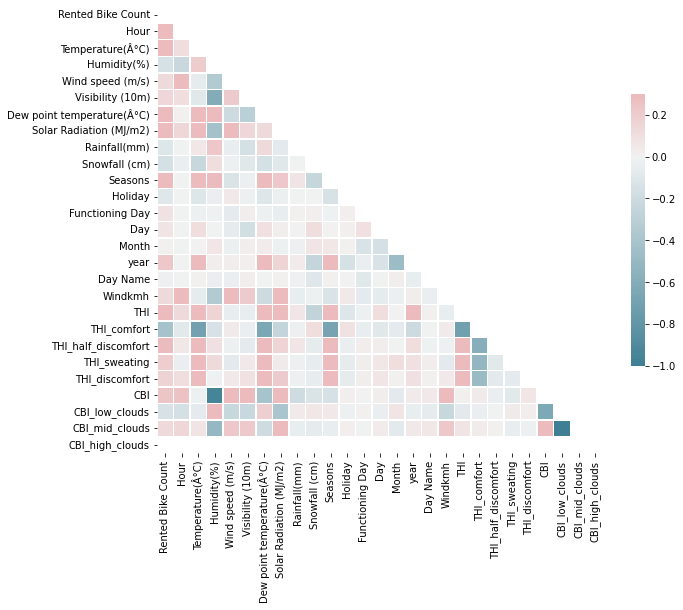

In [ ]:
import seaborn as sns
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
data.shape

(6000, 28)

In [ ]:
data=data.drop(["Date"],axis=1)
test=test.drop(["Date"],axis=1)

In [ ]:
data['rush_hour'] = data['Hour'].apply(lambda x: 1 if x == 8 or x == 18 or x == 7 or x == 9 or x == 17 or x == 19 else 0)
test['rush_hour'] = test['Hour'].apply(lambda x: 1 if x == 8 or x == 18 or x == 7 or x == 9 or x == 17 or x == 19 else 0)
data.loc[data['Functioning Day'] == 0 , 'rush_hour'] = 0
test.loc[test['Functioning Day'] == 0 , 'rush_hour'] = 0

In [ ]:
#we only need winter and summer
data['winter']=0
test['winter']=0
data.loc[(data['Seasons'] == 1),'winter'] =1
test.loc[(test['Seasons'] == 1),'winter'] =1

data['summer']=0
test['summer']=0
data.loc[(data['Seasons'] == 5),'summer'] =1
test.loc[(test['Seasons'] == 5),'summer'] =1

In [ ]:
data=data.drop(["Seasons"],axis=1)
test=test.drop(["Seasons"],axis=1)

In [ ]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'Wind speed (m/s)', 1.5)
data['Wind speed (m/s)']= np.where(data['Wind speed (m/s)'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['Wind speed (m/s)'] < RM_lower_limit, RM_lower_limit,data['Wind speed (m/s)']))    

In [ ]:
#Finding the maximum and minimum for solar radiation
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'Solar Radiation (MJ/m2)', 1.5)
data['Solar Radiation (MJ/m2)']= np.where(data['Solar Radiation (MJ/m2)'] > RM_upper_limit, RM_upper_limit,
                       np.where(data['Solar Radiation (MJ/m2)'] < RM_lower_limit, RM_lower_limit,data['Solar Radiation (MJ/m2)']))

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(["Rented Bike Count"],axis=1)
y=data["Rented Bike Count"]   
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=3) 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression,LinearRegression
# create and configure model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))

390.60328078275893


In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

392.3213829247649


In [ ]:
#RUNN
from sklearn.ensemble  import RandomForestRegressor
clf = RandomForestRegressor(max_depth=15, random_state=42)
clf.fit(X_train,  y_train)
y_pred= clf.predict(test)

In [ ]:
# Extra Trees Model #Ruun
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

model = ExtraTreesRegressor(random_state=100)                          
gsc = GridSearchCV(
    estimator=model,
    param_grid={
        'n_estimators': [80],
        "max_depth":[15],
        'min_samples_split': [3],
        'random_state':[100],
    },
    cv=12,verbose=0,
)

gsc.fit(X_train, y_train)
y_pred = gsc.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred, squared=False)))

13.094013055474685


In [ ]:
from  xgboost  import  XGBRegressor
from sklearn.metrics import mean_squared_error

model = XGBRegressor(random_state = 0, n_jobs=2, n_estimators=100 , max_depth=15)
model.fit(X_train, y_train)
y_pred = model.predict(test)

[21:56:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred, squared=False))

390.7674448612299


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.049e+08, tolerance: 1.937e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn.linear_model import Ridge
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(test)

In [ ]:
result=pd.DataFrame({"ID":index,"Rented Bike Count":y_pred})

In [ ]:
result=result.set_index("ID")

In [ ]:
result.to_csv('Result9.csv')

In [ ]:
c = pd.read_csv("/content/Result9.csv", encoding= 'unicode_escape')
v = pd.read_csv("/content/Resultacc.csv", encoding= 'unicode_escape')
c["Rented Bike Count"]     #100

0       864.051000
1       587.445186
2       486.454621
3       347.363444
4       232.741775
           ...    
2755    671.048083
2756    534.865944
2757    545.099222
2758    492.517889
2759    432.753288
Name: Rented Bike Count, Length: 2760, dtype: float64